# Metadata

* Title: **Final Project Report**
* Class: DS 5100
* Date:
* Student Name: Armin Foroughi
* Student Net ID: zdt3jg 
* This URL: http://localhost:8888/notebooks/Documents/UVA/final_project/final-project-submission.ipynb#Directory-Listing
* GitHub Repo URL: https://github.com/arminforoughi/final-project-submission

# The Monte Carlo Module

In [36]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [15]:


class Die():
    """
    Creating class die 
    """
    def __init__(self,faces):
        """
        takes faces as arguement and creates public faces array,
        it also makes sure the array is unique and creates and array of ones for the weight.
        then it creates the die 
        """
        self.faces = np.unique(faces)
        self.df_die = pd.DataFrame({'Faces':self.faces, 'weights':[1 for i in range(len(self.faces))]})

    def change_the_weight(self, face, weight):
        """
        changes the weight of the given face.
        input:face, weight
        action:change in df_die
        """
        try:
            float(weight)
        except:
            print('not numeric weight')
            return
        if face in self.df_die['Faces'].tolist():
            #self.df_die[face] = weight
            self.df_die['weights'][self.df_die.index[self.df_die['Faces'] == face]] = float(weight)

    def roll(self, roll_times = 1):
        """
        rolls the die roll_times 
        """
        return random.choices(self.df_die['Faces'], weights=self.df_die['weights'], k=roll_times)
    def show(self):
        return self.df_die

        
class Game():
    """
    A class that we can play games in 
    """
    def __init__(self, Die_list):
        """
        input:Die_list: a list of dies 
        takes a list of dies and initiates the game
        """
        self.games = Die_list

    def play(self, roll_times):
        """
        input:roll_times 
        takes roll_times and rolls all the dice roll_times times.
        """
        name = 1
        self.__df = pd.DataFrame({1:self.games[0].roll(roll_times)})
        for game in self.games[1:]:
            name += 1
            self.__df[name] = game.roll(roll_times)
        return self. __df
    def show(self,typa ='wide'):
        """
        takes typa as arguement and returns private df as typa
        """

        if typa == 'wide':
            return self. __df
        elif typa == 'narrow':
            return pd.DataFrame(self.__df.unstack(level=-1))
        else:
            raise ValueError("worng type")
 

class Analyzer():
    """
    Takes game as arguament an does some analysis on the game
    """
    
    def __init__(self, game):
        """
        takes game as argument and initilizes it
        also initializes the needed dataframes
        """

        self.game = game
        self.df_narrow = self.game.show('narrow')
        self.df_wide = self.game.show()
        self.df_face_counts_per_roll = None
        self.unique_df = None
        self.combo_df = None

    def face_counts_per_roll(self):
        """
        method to compute how many times a given face is rolled in each event.
        """
        self.df_face_counts_per_roll = self.df_wide.apply(pd.Series.value_counts,axis = 1).fillna(0)

    def jackpot(self):
        """
        a method to count how many times a roll resulted in all faces being the same
        """

        self.unique_df = self.df_wide[self.df_wide.nunique(1) == 1]
        return (self.df_wide.nunique(1) == 1).sum()

    def combo(self):
        """
        method to compute the distinct combinations of faces rolled, along with their counts
        """

        self.combo_df = self.df_wide.value_counts()



# Test Module

In [73]:
import unittest
from montecarlo import Die, Game, Analyzer

class test_die(unittest.TestCase):


    def test_die1(self):
        new = Die([1,2,3,4,5])
        new.change_the_weight(3, .4)
        self.assertEqual(float(new.show()[new.show().Faces == 3]['weights']), .4)
        #assertEqual(1,1)

    def test_die2(self):
        new = Die([1,2,3,4,5, 1,2,3,4,5])
        new.change_the_weight(3, .4)
        new.change_the_weight(5, .1)
        self.assertEqual(float(new.show()[new.show().Faces == 5]['weights']), .1)
        #assertEqual(1,1)

    def test_die3(self):
        coin_fair = Die(['H', 'T']) #fair coin
        coin_unfair1 = Die(['H', 'T']) #unfair coin
        coin_unfair1.change_the_weight('H', 5)
        self.assertEqual(float(coin_unfair1.show()[coin_unfair1.show().Faces == 'H']['weights']), 5)
        coin_unfair1.roll(5)
        self.assertEqual(len(coin_unfair1.df_die), 2)
        #assertEqual(1,1)
        #assertEqual(1,1)
    def test_die3(self):
        coin_fair = Die(['H', 'T']) #fair coin
        coin_fair.roll(5)
        self.assertEqual(len(coin_fair.roll(5)), 5)
        #assertEqual(1,1)
        #assertEqual(1,1)

class test_Game(unittest.TestCase):


    def test_game1(self):
        coin_fair = Die(['H', 'T']) #fair coin
        game1 = Game([coin_fair, coin_fair, coin_fair]) #creating a fair game variable
        self.assertEqual(len(game1.play(1000)),1000)

    def test_game2(self):
        coin_fair = Die(['H', 'T']) #fair coin
        game1 = Game([coin_fair, coin_fair, coin_fair]) #creating a fair game variable
        game1.play(1000) # playing the game 1000 times
        self.assertEqual(len(game1.show()),1000)

    def test_game3(self):
        coin_fair = Die(['H', 'T']) #fair coin
        coin_unfair1 = Die(['H', 'T']) #unfair coin
        coin_unfair1.change_the_weight('H', 5) # changing the weight
        game2 = Game([coin_unfair1, coin_unfair1, coin_fair])#creating a unfair game variable
        game2.play(1000)
        self.assertEqual(game2.show('narrow').shape,(3000, 1))
        #assertEqual(1,1)

class test_Analyzer(unittest.TestCase):

    def test_analyzer1(self):

        die_fair = Die([1,2,3,4,5,6])
        die_unfair1 = Die([1,2,3,4,5,6])
        die_unfair1.change_the_weight(6, 5)
        die_unfair2 = Die([1,2,3,4,5,6])
        die_unfair1.change_the_weight(1, 5)
        game2 = Game([die_unfair1, die_unfair1, die_unfair2, die_fair])
        play2 = game2.play(10000)

        analyzer2 = Analyzer(game2)

        analyzer2.combo()

        self.assertEqual(len(analyzer2.combo_df.index.names), 4)

    def test_analyzer2(self):

        die_fair = Die([1,2,3,4,5,6])

        game1 = Game([die_fair, die_fair, die_fair, die_fair, die_fair])
        play1 = game1.play(10000)

        analyzer1 = Analyzer(game1)

        analyzer1.face_counts_per_roll()
        self.assertEqual(analyzer1.df_face_counts_per_roll.shape, (10000, 6))

    def test_analyzer3(self):

        die_fair = Die([1,2,3,4,5,6])

        game1 = Game([die_fair, die_fair, die_fair, die_fair, die_fair])
        play1 = game1.play(10000)

        analyzer1 = Analyzer(game1)
        analyzer1.jackpot()

        self.assertEqual(len(analyzer1.unique_df.columns), 5)



# Test Results

Ran 9 tests in 3.702s

OK


# Scenarios


# Scenario 1
Creating one fair coin (with faces H and T) and one unfair coin. 
The unfair coin has one face with a weight of 5 and the others 1.

In [16]:
coin_fair = Die(['H', 'T']) #fair coin
coin_unfair1 = Die(['H', 'T']) #unfair coin
coin_unfair1.change_the_weight('H', 5) # changing the weight


/var/folders/c3/jct_vr856m7070yzm_vg2gvm0000gn/T/ipykernel_89440/893279945.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_die['weights'][self.df_die.index[self.df_die['Faces'] == face]] = float(weight)


In [17]:
game1 = Game([coin_fair, coin_fair, coin_fair]) #creating a fair game variable 
game2 = Game([coin_unfair1, coin_unfair1, coin_fair])#creating a unfair game variable 
game1.play(1000) # playing the game 1000 times 
game2.play(1000)# playing the game 1000 times 

,1,2,3
0,T,H,H
1,H,T,T
2,H,H,H
3,H,T,H
4,H,H,H
...,...,...,...
995,H,H,H
996,H,H,H
997,H,H,T
998,H,H,T


## creating analyzer variable 

In [29]:
analyzer1 = Analyzer(game1) 
analyzer2 = Analyzer(game2)

In [30]:
print('game 1 with all the fair coins has {} out of 1000 jackpots'.format(analyzer1.jackpot()))

game 1 with all the fair coins has 245 out of 1000 jackpots


In [37]:
print('game 2 with two unfair coins has {} out of 1000 jackpots'.format(analyzer2.jackpot()))

game 2 with two unfair coins has 346 out of 1000 jackpots


In [38]:
unique1 = analyzer1.unique_df
unique2 = analyzer2.unique_df

In [39]:
print('game 1 with all the fair coins has {} heads and {} tail jackpots'.format((unique1[1] == 'H').sum(),  (unique1[1] == 'T').sum()))

game 1 with all the fair coins has 109 heads and 136 tail jackpots


In [40]:
print('game 2 with two unfair coins has {} heads and {} tail jackpots'.format((unique2[1] == 'H').sum(),  (unique2[1] == 'T').sum()))

game 2 with two unfair coins has 333 heads and 13 tail jackpots


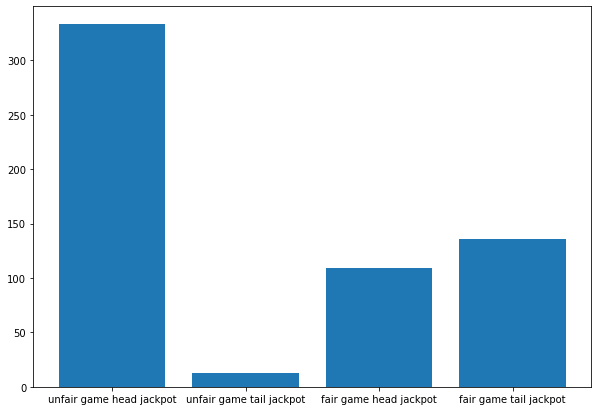

In [41]:
fig = plt.figure(figsize =(10, 7))
plt.bar(['unfair game head jackpot', 'unfair game tail jackpot', 'fair game head jackpot', 'fair game tail jackpot'],
        [(unique2[1] == 'H').sum(), (unique2[1] == 'T').sum(), (unique1[1] == 'H').sum(),  (unique1[1] == 'T').sum()])
plt.show()

the unfair game is more bias towards head and the fair game is fair

# Scenario 2
Creating a fair die and two unfair dice

all of six sides with the faces 1 through 6.

(Type 1) unfair die will weight 6 five times more than the others 

(Type 2) unfair die will weight 1 five times more than the others.

In [42]:
die_fair = Die([1,2,3,4,5,6])
die_unfair1 = Die([1,2,3,4,5,6])
die_unfair1.change_the_weight(6, 5)
die_unfair2 = Die([1,2,3,4,5,6])
die_unfair1.change_the_weight(1, 5)

In [43]:
game1 = Game([die_fair, die_fair, die_fair, die_fair, die_fair])
play1 = game1.play(10000)
game2 = Game([die_unfair1, die_unfair1, die_unfair2, die_fair])
play2 = game2.play(10000)

analyzer1 = Analyzer(game1)
analyzer2 = Analyzer(game2)




In [71]:
analyzer1.face_counts_per_roll()
analyzer1.unique_df

5

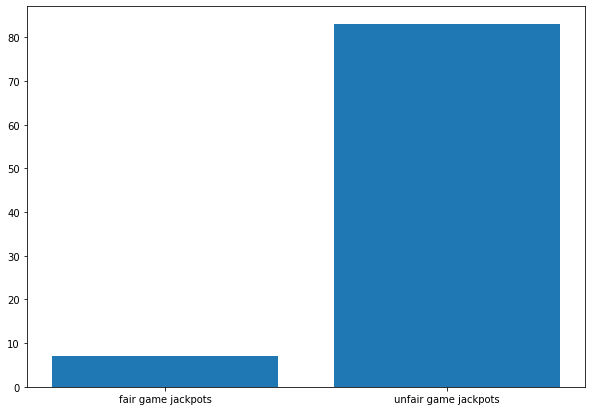

In [48]:

fig = plt.figure(figsize =(10, 7))
plt.bar(['fair game jackpots', 'unfair game jackpots'],
        [analyzer1.jackpot(), analyzer2.jackpot()])
plt.show()

the unfair game had alot more jackpots than the fair game 

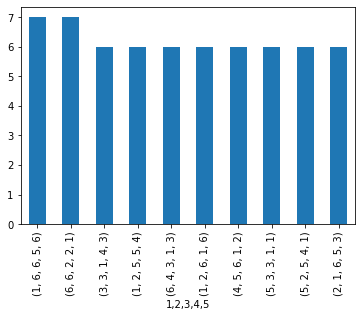

In [49]:

analyzer1.combo()
analyzer2.combo()
analyzer1.combo_df[:10].plot.bar()
plt.show()

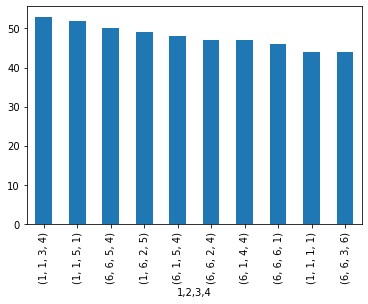

In [50]:
analyzer2.combo_df[:10].plot.bar()
plt.show()

the unfair game had alot more common combinations than the fair game 

# Scenario 3
Creating a die of letters from a to z with weights based on their frequency on the  Appendix.

In [51]:
#from the Appendix
Appendix = '''A,8.4966
B,2.0720
C,4.5388
D,3.3844
E,11.1607
F,1.8121
G,2.4705
H,3.0034
I,7.5448
J,0.1965
K,1.1016
L,5.4893
M,3.0129
N,6.6544
O,7.1635
P,3.1671
Q,0.1962
R,7.5809
S,5.7351
T,6.9509
U,3.6308
V,1.0074
W,1.2899
X,0.2902
Y,1.7779
Z,0.2722'''

def apendix_todf(df):
    a  = df.split(',')[0]
    b = df.split(',')[1]
    return pd.Series([a,b])
apendix_df = pd.Series(Appendix.split('\n')).apply(apendix_todf) # trying to turn the apendix into dataframe

In [52]:
alphabet_die = Die(apendix_df[0]) # creating a die 

chaning the weights 

In [53]:
apendix_df.apply(lambda x: alphabet_die.change_the_weight(x[0], x[1]), axis=1) #chaning the weights 
alphabet_die.show()

,Faces,weights
0,A,8.4966
1,B,2.0720
2,C,4.5388
3,D,3.3844
4,E,11.1607
5,F,1.8121
6,G,2.4705
7,H,3.0034
8,I,7.5448
9,J,0.1965


creating a game 

In [54]:
game_alphabet = Game([alphabet_die, alphabet_die, alphabet_die, alphabet_die, alphabet_die]) 
game_alphabet.play(1000)

,1,2,3,4,5
0,S,N,V,C,I
1,R,R,U,T,B
2,L,E,I,I,N
3,Y,T,R,N,T
4,E,C,C,E,R
...,...,...,...,...,...
995,A,O,R,N,E
996,N,D,S,F,T
997,N,P,B,O,H
998,R,I,R,N,O


running a sample 

In [55]:
game_alphabet.show().sample(10)

,1,2,3,4,5
36,A,N,C,T,S
86,E,R,Q,W,E
91,L,E,H,G,R
926,A,A,C,O,U
561,N,T,H,N,O
284,A,M,S,C,M
227,O,M,N,T,M
339,U,R,R,D,M
351,T,G,V,S,C
406,I,L,R,O,N


after running the sample 10 times (looking at 100 words) I found 8/100 words were english

# Directory Listing

A code block that executes the following bash command: 

```bash
!ls -lRF -o
```

In [74]:
!ls -lRF -o

total 296
-rw-r--r--  1 arminforoughi    483 Dec  6 15:50 README.md
drwxr-xr-x@ 4 arminforoughi    128 Dec  6 19:48 __pycache__/
-rw-r--r--  1 arminforoughi  72022 Dec  6 20:43 final-project-submission.ipynb
-rw-r--r--  1 arminforoughi   1974 Dec  6 12:37 montecarlo.py
-rw-r--r--  1 arminforoughi  63162 Dec  6 15:30 montecarlo_demo.ipynb
-rw-r--r--@ 1 arminforoughi      0 Dec  6 20:44 montecarlo_test_results.txt
-rw-r--r--@ 1 arminforoughi   3354 Dec  6 20:43 montecarlo_tests.py

./__pycache__:
total 16
-rw-r--r--  1 arminforoughi  3067 Dec  6 19:14 montecarlo.cpython-39.pyc
-rw-r--r--  1 arminforoughi  1930 Dec  6 19:48 montecarlo_tests.cpython-39.pyc


# Installation Output Listing
    
A code block that executes the code to install your your package and outputs a successful installation.

In [76]:
from montecarlo import Die, Game, Analyzer